In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

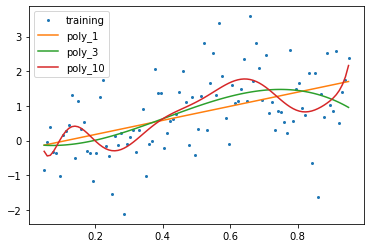

In [6]:
# linear function with noise n
N_train=100
sigma_train=1
n = sigma_train*np.random.randn(N_train)
x=np.linspace(0.05,0.95,N_train)
y = 2*x+n

# linear regression
clf1 = LinearRegression()
X1 = x.reshape((len(x),1))
clf1.fit(X1,y)

# polynomial regressions
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X1)
clf3 = LinearRegression()
clf3.fit(X3,y)

poly10 = PolynomialFeatures(degree=10)
X10 = poly10.fit_transform(X1)
clf10 = LinearRegression()
clf10.fit(X10,y)

#plot
plt.plot(x, y, "o", ms=2, label="training")
plt.plot(x, clf1.predict(X1), label="poly_1")
plt.plot(x, clf3.predict(X3), label="poly_3")
plt.plot(x, clf10.predict(X10), label="poly_10")

plt.legend()
plt.show()

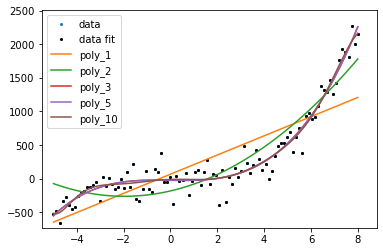

In [12]:
def fit(x,y,d=1):
    X = x[:,np.newaxis]
    poly = PolynomialFeatures(degree=d)
    X = poly.fit_transform(X)
    clf = LinearRegression()
    clf.fit(X,y)
    return clf, X

N = 100
s = 150
n = s*np.random.randn(N)
x = np.linspace(-5,8,N)
y = 7.2 -3.1*x+4.3*x**3 + n

plt.plot(x,y,"o",ms=2,label="data")

# mask for fit
xfit = x#[50:]
yfit = y#[50:]
plt.plot(xfit,yfit,"ok",ms=2,label="data fit")

for d in [1,2,3,5,10]:
    clf, Xfit = fit(xfit,yfit,d)
    poly = PolynomialFeatures(degree=d)
    X = poly.fit_transform(x[:,np.newaxis])
    plt.plot(x,clf.predict(X),label=f"poly_{d}")
plt.legend()
plt.xlim(1.1*min(x),1.1*max(x))
plt.ylim(1.1*min(y),1.1*max(y))
plt.show()